In [1]:
# Imports all packages necessary or useful

import os
import pandas as pd
import numpy as np
import csv
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
# only necessary first run: nltk.download()
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import *
import tensorflow.keras.preprocessing 
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from tensorflow.keras.layers import LSTM, Dense, Dropout
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Sets our working directory

os.chdir(r"C:\Users\caleb\OneDrive\Desktop\WGU\D213 - Advanced Data Analytics\sentiment labelled sentences")
os.getcwd()

'C:\\Users\\caleb\\OneDrive\\Desktop\\WGU\\D213 - Advanced Data Analytics\\sentiment labelled sentences'

In [3]:
# Removes the column width limit so we can explore values in their entirety

pd.set_option('display.max_colwidth', 0)

In [4]:
# Imports our Amazon data

df_a = pd.read_csv(r"amazon_cells_labelled.txt", sep = '\t', header = None, quoting = csv.QUOTE_NONE, names = ['Review', 'Sentiment'])
df_a.head()

,Review,Sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1


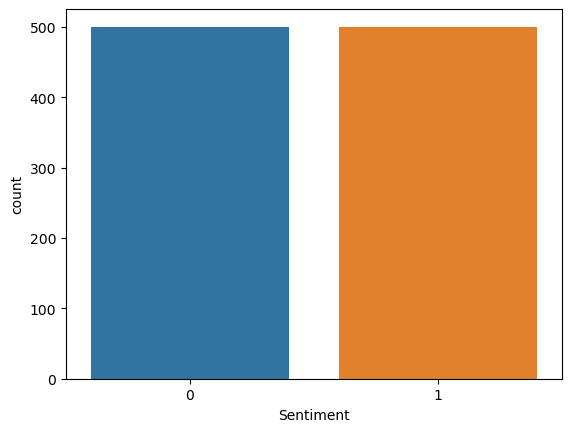

In [5]:
# Visualizes our Amazon data set 

sns.countplot(x='Sentiment', data=df_a)
plt.show()

In [6]:
# Imports our IMDB data

df_i = pd.read_csv(r"imdb_labelled.txt", sep = '\t', header = None, quoting = csv.QUOTE_NONE, names = ['Review', 'Sentiment'])
df_i.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1


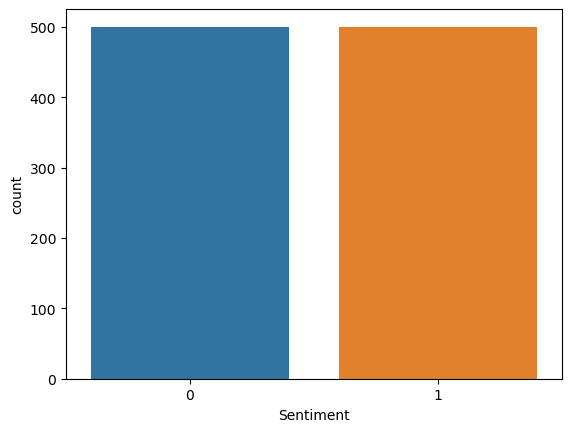

In [7]:
# Visualizes our IMDB data set 

sns.countplot(x='Sentiment', data=df_i)
plt.show()

In [8]:
# Imports our yelp data

df_y = pd.read_csv(r"yelp_labelled.txt", sep = '\t', header = None, quoting = csv.QUOTE_NONE, names = ['Review', 'Sentiment'])
df_y.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1


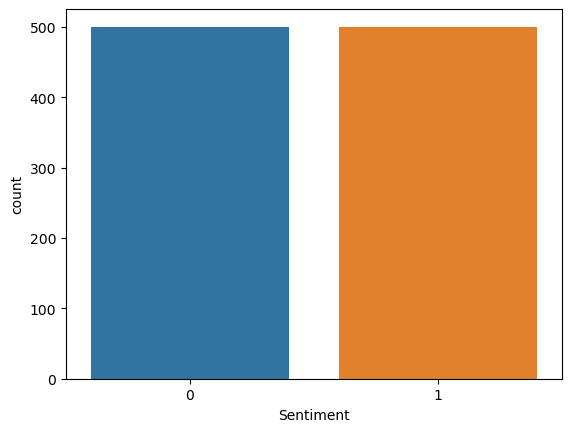

In [9]:
# Visualizes our yelp data set 

sns.countplot(x='Sentiment', data=df_y)
plt.show()

In [10]:
# Combines our 3 data sets into a single dataframe

df = pd.concat([df_a, df_i, df_y], ignore_index = True)
df.head()

,Review,Sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1


In [11]:
# Checks for null values

df.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [12]:
# Drops null values

df = df.dropna()
df.head()

,Review,Sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1


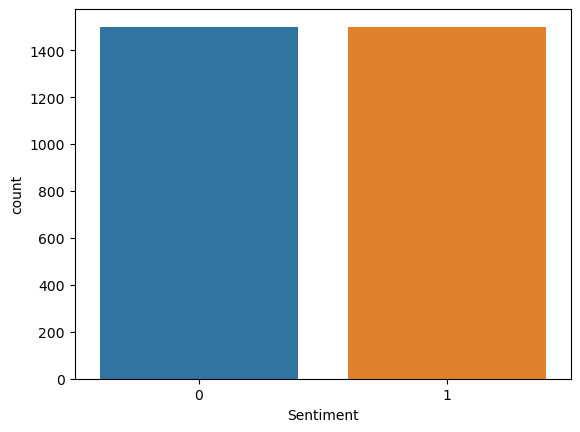

In [13]:
# Visualizes our combined data set 

sns.countplot(x='Sentiment', data=df)
plt.show()

In [14]:
# Converts all capitalization in 'Review' to lower case to allow for faster tokenization (vs processing lower plus upper case)

df['Review'] = df['Review'].str.lower()
df

,Review,Sentiment
0,so there is no way for me to plug it in here in the us unless i go by a converter.,0
1,"good case, excellent value.",1
2,great for the jawbone.,1
3,tied to charger for conversations lasting more than 45 minutes.major problems!!,0
4,the mic is great.,1
...,...,...
2995,i think food should have flavor and texture and both were lacking.,0
2996,appetite instantly gone.,0
2997,overall i was not impressed and would not go back.,0
2998,"the whole experience was underwhelming, and i think we'll just go to ninja sushi next time.",0


In [15]:
# Lists character count for our combined data to see if any unusual characters exist that can be eliminated later

commentary = df['Review']
list_of_characters = []
for comment in commentary: 
    for character in comment: 
        if character not in list_of_characters: 
            list_of_characters.append(character)
print(list_of_characters)

['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'b', 'c', 'v', '.', 'd', ',', 'x', 'j', '4', '5', '!', 'z', 'q', '+', '"', 'k', "'", '/', '7', '3', '6', '8', '0', '2', '?', '-', '1', ':', ')', '(', '&', '$', '*', ';', '%', '9', '#', '[', ']', '\x96', 'é', '\x85', 'å', '\x97', 'ê']


In [16]:
# Identifies review length by number of words

reviews = df['Review']
review_length = []
for char_len in reviews:
    review_length.append(len(char_len.split(" ")))

review_min = np.min(review_length)
review_max = np.max(review_length)
review_median = np.median(review_length)
print("Min sequence length: ", review_min)
print("Max sequence length: ", review_max)
print("Median sequence length: ", review_median)

Min sequence length:  1
Max sequence length:  73
Median sequence length:  11.0


In [17]:
# Removes puncuation

punc = re.compile(r'[^\w\s]+')
df['Review'] = [punc.sub('', x) for x in df['Review'].tolist()]
df

,Review,Sentiment
0,so there is no way for me to plug it in here in the us unless i go by a converter,0
1,good case excellent value,1
2,great for the jawbone,1
3,tied to charger for conversations lasting more than 45 minutesmajor problems,0
4,the mic is great,1
...,...,...
2995,i think food should have flavor and texture and both were lacking,0
2996,appetite instantly gone,0
2997,overall i was not impressed and would not go back,0
2998,the whole experience was underwhelming and i think well just go to ninja sushi next time,0


In [18]:
# Sets stop words

stop_words = set(stopwords.words('english'))

data_set = []
for sentence in df['Review']:
    data_set.append([word for word in word_tokenize(sentence) if word not in stop_words])

In [19]:
# Tokenizes our data

x = data_set
tokenizer = Tokenizer(num_words = 50000)
tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)

In [20]:
# Gives us a unique word count plus one placeholder for OOV (out of vocabulary) words in our lexicon

print(len(tokenizer.word_index) + 1)

5277


In [21]:
# Truncates our data via lemmatization (vs stemming)

lemmatizer = WordNetLemmatizer()

def lem (token_text):
    text = [lemmatizer.lemmatize(word) for word in token_text]
    return text

df['Review'].apply(lambda x: lem(x))
df['Lemmatized Words'] = [len(x.split()) for x in df['Review'].tolist()]
df['Lemmatized Characters'] = df['Review'].apply(len)

In [22]:
# Pads our data

max_length = 73
x = pad_sequences(x, maxlen = max_length, padding = 'post', truncating = 'post')
print(x.shape)

(3000, 73)


In [23]:
# Confirms tokenization and padding

print(x)

[[  45  269   96 ...    0    0    0]
 [   1   70   35 ...    0    0    0]
 [   2  948    0 ...    0    0    0]
 ...
 [ 193  145   16 ...    0    0    0]
 [ 261   81 1976 ...    0    0    0]
 [1655  332   55 ...    0    0    0]]


In [24]:
# Splits our data into training, validation, and testing sets

y = df['Sentiment']

train_pct = 0.5
test_pct = 0.25
validation_pct = 0.25

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_pct, random_state = 43, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_pct/(test_pct + validation_pct), random_state = 43, shuffle = False) 

print(X_train.shape, X_test.shape, X_val.shape)

(1500, 73) (750, 73) (750, 73)


In [25]:
# Creates our model

model = Sequential() 
model.add(Embedding(50000, 64, input_length = 73)) # Static
tf.keras.layers.GlobalAveragePooling1D() # Static; helps reduce model overfitting
model.add(LSTM(256, dropout = 0.2)) # Experimental
model.add(Dense(10, input_dim = 1, activation = 'sigmoid')) # Experimental
model.add(Dense(2, input_dim = 1, activation = 'sigmoid')) # Experimental
model.add(Dense(1, activation = 'sigmoid')) # Experimental
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy']) # Experimental
print(model.summary()) 



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 73, 64)            3200000   
                                                                 
 lstm (LSTM)                 (None, 256)               328704    
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3531299 (13.47 MB)
Trainable params: 3531299 (13.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [26]:
# Creates an early stop for our model

callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

In [27]:
# Fits our data to our model
# validation_split corresponds with test split if present
# May test with low initial value for 'epochs' and increase value when accuracy scores improve based on preceding model parameters

history = model.fit(X_train, y_train, epochs = 25, validation_split = 0.25, batch_size = 32, callbacks = [callback])

Epoch 1/25


36/36 [==============================] - 6s 98ms/step - loss: 0.7371 - accuracy: 0.4916 - val_loss: 0.6871 - val_accuracy: 0.5760
Epoch 2/25
36/36 [==============================] - 4s 100ms/step - loss: 0.7263 - accuracy: 0.4916 - val_loss: 0.6838 - val_accuracy: 0.5760
Epoch 3/25
36/36 [==============================] - 4s 101ms/step - loss: 0.7177 - accuracy: 0.4916 - val_loss: 0.6822 - val_accuracy: 0.5760
Epoch 4/25
36/36 [==============================] - 3s 97ms/step - loss: 0.7117 - accuracy: 0.4916 - val_loss: 0.6816 - val_accuracy: 0.5760
Epoch 5/25
36/36 [==============================] - 3s 96ms/step - loss: 0.7069 - accuracy: 0.4916 - val_loss: 0.6817 - val_accuracy: 0.5760
Epoch 6/25
36/36 [==============================] - 4s 102ms/step - loss: 0.7036 - accuracy: 0.4916 - val_loss: 0.6821 - val_accuracy: 0.5760
Epoch 7/25
36/36 [==============================] - 4s 100ms/step - loss: 0.7013 - accuracy: 0.4916 - val_loss: 0.6828 - val_accuracy: 0.5760
Epoch 8

In [28]:
# Prints the loss and accuracy scores of our model

res = model.evaluate(X_test, y_test, verbose = 0)

print ('Test Loss: ', res[0])
print ('Test accuracy: ', res[1])

Test Loss:  0.6933430433273315
Test accuracy:  0.48533332347869873


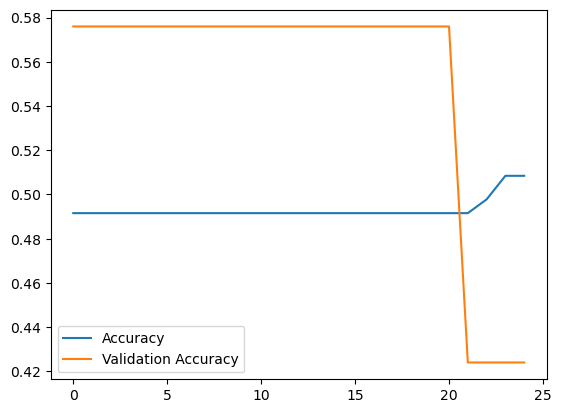

In [29]:
# Plots our model accuracy

plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

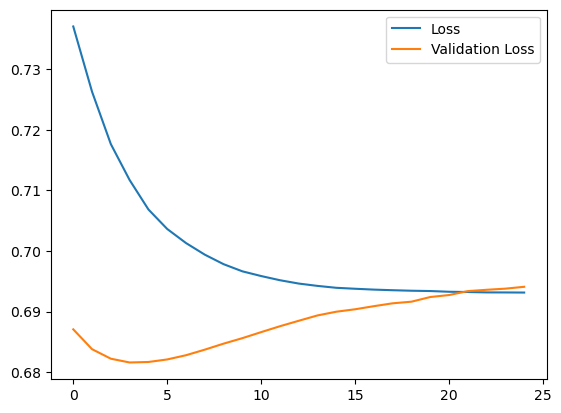

In [30]:
# Plots our model loss

plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

In [31]:
# Defines a function to test the model

def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw, maxlen = 73)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", y[prediction])

In [32]:
# Tests the model
# Predicted label: 1 indicates the model classifies a test sentence sentiment as positive 
# Predicted label: 0 indicates the model classifies a test sentence sentiment as negative

test_sentence1 = "I loved this phone charger." # Amazon test sentence
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst movie I have ever seen." # IMDB test sentence
predict_sentiment(test_sentence2)

test_sentence3 = "The spaghetti is great." # yelp test sentence
predict_sentiment(test_sentence3)

1/1 [==============================] - 1s 604ms/step
Predicted label:  1
1/1 [==============================] - 0s 33ms/step
Predicted label:  1
1/1 [==============================] - 0s 33ms/step
Predicted label:  1


In [33]:
# Saves our model

model.save('SAModel.h5')